everything is simplified down to a 3 layer graph; there are two roles, location controls transitions, there are 200 subjects. keeping data from every subject in the same database to prevent people from taking the experiment twice, this will require manually taking care of the database file. for this reason, i will have different versions of the experiment by using the 'experiment version' column on the psiturk database.


In [1]:
import os, re
import pandas as pd
import numpy as np
import json

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 22

from csw_analysis import get_sql_df,assign_expr

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

### reading from database: once stable move outside

In [35]:
# {'key':codeversion}
dataset_dict = {  
  'csw3_udet': '10.13.18',
  '1000cl_NQNQ': '1000cl',
  
  '40B1000cl': '1000clq',
  '40B9010cl':'9010cl',
  '01B1000cl':'i1000cl',
  '20B1000cl':'20B1000cl',
  '10B1000cl':'10B1000cl',
  
  'RT40B1000cl':'RT40B1000cl',
  'RT01B1000cl':'RT01B1000cl'
}

# load sql database as dataframe
DATASET_NAME = 'RT01B1000cl'
sql_df = get_sql_df(dataset_dict[DATASET_NAME])
Nsubs,_ = sql_df.shape

last exp found mturk_data/exp_1127123208
table name: CSWfall18
versions found ['10.13.18' '1000cl' '1000clq' '9010cl' 'i1000cl' '20B1000cl'
 'RT01B1000cl']
loading code version: RT01B1000cl
N = 55 subjects


In [27]:
sql_df

,uniqueid,assignmentid,workerid,hitid,ipaddress,browser,platform,language,cond,counterbalance,codeversion,beginhit,beginexp,endhit,bonus,status,mode,datastring
375,A1TO8F0HIM1OBQ:3NL0RFNU0GJA89FM7P6PLWAIZQ44K6,3NL0RFNU0GJA89FM7P6PLWAIZQ44K6,A1TO8F0HIM1OBQ,372AGES0I41K7VJYRICPVZX9EBUXRB,107.210.162.40,chrome,macos,UNKNOWN,56,0,RT40B1000cl,2018-11-20 09:57:05.963815,None,2018-11-20 11:30:40.621756,2.00,7,live,"{""condition"":56,""counterbalance"":0,""assignment..."
376,A21QUJTIIAOX2W:36DSNE9QZ6UJ1IJM8OLMYFGA1S4JOW,36DSNE9QZ6UJ1IJM8OLMYFGA1S4JOW,A21QUJTIIAOX2W,372AGES0I41K7VJYRICPVZX9EBUXRB,50.93.233.253,chrome,chromeos,UNKNOWN,65,0,RT40B1000cl,2018-11-20 09:58:42.329745,None,2018-11-20 10:53:53.680892,2.00,7,live,"{""condition"":65,""counterbalance"":0,""assignment..."
379,A2FNQQTVE32XD9:3E4GGUZ1T9N05V0Z3BN1SHDKFD3K2N,3E4GGUZ1T9N05V0Z3BN1SHDKFD3K2N,A2FNQQTVE32XD9,372AGES0I41K7VJYRICPVZX9EBUXRB,71.90.162.142,chrome,windows,UNKNOWN,73,0,RT40B1000cl,2018-11-20 12:40:24.418215,None,2018-11-20 13:48:56.229396,2.00,7,live,"{""condition"":73,""counterbalance"":0,""assignment..."
382,A1299WL9DI3TEF:323Q6SJS8JCT4ZB3LLZBZ8RHW1YFHU,323Q6SJS8JCT4ZB3LLZBZ8RHW1YFHU,A1299WL9DI3TEF,372AGES0I41K7VJYRICPVZX9EBUXRB,24.213.184.142,chrome,windows,UNKNOWN,87,0,RT40B1000cl,2018-11-20 13:53:56.725095,None,2018-11-20 14:39:41.910928,2.00,7,live,"{""condition"":87,""counterbalance"":0,""assignment..."
384,A3N6552D8M4QW8:3TS1AR6UQRAWBA5R8CDZ8V2NIYH7FZ,3TS1AR6UQRAWBA5R8CDZ8V2NIYH7FZ,A3N6552D8M4QW8,372AGES0I41K7VJYRICPVZX9EBUXRB,75.189.5.170,chrome,windows,UNKNOWN,82,0,RT40B1000cl,2018-11-20 14:16:58.536184,None,2018-11-20 15:25:56.800519,2.00,7,live,"{""condition"":82,""counterbalance"":0,""assignment..."
390,A22LZ62E0UC4VL:3TXWC2NHN0M9TYY6TTBITQC82FUS9C,3TXWC2NHN0M9TYY6TTBITQC82FUS9C,A22LZ62E0UC4VL,372AGES0I41K7VJYRICPVZX9EBUXRB,173.52.48.105,chrome,macos,UNKNOWN,29,0,RT40B1000cl,2018-11-20 16:22:05.244312,None,2018-11-20 17:09:58.378617,2.00,7,live,"{""condition"":29,""counterbalance"":0,""assignment..."
391,A12FCLCVIM2CL3:3EICBYG645SISTMJIJCV3FMTCHUJCE,3EICBYG645SISTMJIJCV3FMTCHUJCE,A12FCLCVIM2CL3,372AGES0I41K7VJYRICPVZX9EBUXRB,75.36.199.186,firefox,windows,UNKNOWN,42,0,RT40B1000cl,2018-11-20 17:25:47.774108,None,2018-11-20 18:30:27.268328,3.98,7,live,"{""condition"":42,""counterbalance"":0,""assignment..."
392,AXKV2UQ5HEG29:3J88R45B2HU2H20C4SD2EOTFMYFPXD,3J88R45B2HU2H20C4SD2EOTFMYFPXD,AXKV2UQ5HEG29,372AGES0I41K7VJYRICPVZX9EBUXRB,65.29.200.76,firefox,windows,UNKNOWN,50,0,RT40B1000cl,2018-11-20 18:56:57.357062,None,2018-11-20 20:09:30.208663,2.00,7,live,"{""condition"":50,""counterbalance"":0,""assignment..."
393,A1KA64FR47O9FS:3IAS3U3I0GCZCSW5XYA8TEUUSLZ2BU,3IAS3U3I0GCZCSW5XYA8TEUUSLZ2BU,A1KA64FR47O9FS,372AGES0I41K7VJYRICPVZX9EBUXRB,108.71.225.10,chrome,macos,UNKNOWN,33,0,RT40B1000cl,2018-11-20 19:15:09.501498,None,2018-11-20 20:11:50.759085,2.00,7,live,"{""condition"":33,""counterbalance"":0,""assignment..."
395,AJACXA5FC5BYZ:39K0FND3AIBK0MV612TWDCOMHRPMA7,39K0FND3AIBK0MV612TWDCOMHRPMA7,AJACXA5FC5BYZ,3PKJ68EHDNS6NH06E9LUQMNOG9DJHI,100.7.52.238,chrome,macos,UNKNOWN,63,0,RT40B1000cl,2018-11-25 12:27:06.828382,None,2018-11-25 13:17:02.352343,3.91,7,live,"{""condition"":63,""counterbalance"":0,""assignment..."


### comments

In [5]:
for i in range(len(sql_df)):
  resp = json.loads(pd.DataFrame(json.loads(sql_df.iloc[i]['datastring'])['data']).iloc[-3].loc['trialdata']['responses'])['Q0']
  if len(resp):
    print('--\n')
    print(resp)

--

I actually didn't catch that pattern. I just know that in some stories money was stolen from the tip jar and then a shaker was stolen and in some stories, a mustache was noticed and then a book was read by the window. There was definitely an obvious pattern, but I didn't even think about the shops having something to do with that pattern.
--

Not really
--

The deeds they did alternated in good/bad in Jungle Brew house but were the same in Deep Ocean Cafe
--

They seemed different but every time I thought I had figured it out I would get the next one wrong.
--

No
--

I just described it earlier.
Basically good Deep Ocean patrons are always good and bad Deep Ocean patrons are always bad.
Jungle Brew patrons always commit one bad thing.
--

No
--

In the Deep Ocean Cafe, people were patient. In the Jungle Brew House, they seemed to be inpatient.
--

Alternated places they went
--

They were getting cake at Deep Ocean Cafe and it was tea from Jungle Brew House
--

yes,very complicate

### make dataframe

In [6]:
def get_block_indices(subj_df,num_stories=110,num_blocks=11):
  """ given a subj_df
  returns the indices of when blocks begins and ends
  which can be used to index a block of stories in subj_df 
  """
  # get indices for begining of stories
  begin_story_bool = subj_df.state == 'BEGIN'
  begin_story_idx = subj_df[begin_story_bool].index
  # get indices for begin and end of blocks
  block_linsp = np.arange(0,109,10)
  begin_block_idx = begin_story_idx[block_linsp]
  end_block_idx = np.hstack([begin_block_idx[1:],np.array([len(subj_df)])])
  return begin_block_idx,end_block_idx

def include_block_idx(subj_df):
  """ inplace column
  """
  subj_df['block'] = 0
  begin_block_idx,end_block_idx = get_block_indices(subj_df)
  for block_num,(bidx,eidx) in enumerate(zip(begin_block_idx,end_block_idx)):
    subj_df.loc[bidx:eidx,'block'] = int(block_num)
  return subj_df

def include_story_idx(subj_df,num_stories):
  """ inplace include column with stories
  """
  bidx = subj_df.loc[subj_df['state']=='BEGIN'].index
  subj_df.loc[bidx,'story'] = np.arange(num_stories,dtype=np.int)
  subj_df.story = np.floor(subj_df.story.interpolate()).astype('int')
  return subj_df




In [7]:
frnode2depth = lambda x: DEPTH_DICT[x]
DEPTH_DICT = {np.nan:100,'BEGIN':0,
              'NODE11':1,'NODE12':1,
              'NODE21':2,'NODE22':2,
              'NODE31':3,'NODE32':3,
              'END':4}

def make_subj_df(psiturk_dstr,num_instruction_trials=3,stories_per_block=10):
  # initialize
  subj_df = pd.DataFrame([t['trialdata'] for t in json.loads(psiturk_dstr)['data']])
  # remove instruction trials
  subj_df = subj_df.iloc[num_instruction_trials:]
  # subj response
  subj_df['response_right'] = subj_df['key_press'] == 39.0 
  subj_df['true_on_right'] = (subj_df['true_on_right'] == "True")
  subj_df['correct_response'] = (subj_df['true_on_right'] == subj_df['response_right'])
  # only keep some columns
  subj_df = subj_df[['type','qtype',
                     'state','fromnode','true_tonode','false_tonode',
                     'rfc','true_rfc','false_rfc',
                     'response_right','true_on_right','correct_response',]]
  ## customizing
  # story columns
  subj_df = include_story_idx(subj_df,num_stories=200)
  # edges
  subj_df['edge'] = subj_df['fromnode'] + subj_df['true_tonode']
  # blocks
  subj_df['block'] = subj_df.story//stories_per_block
  # depth
  subj_df['depth']=subj_df.fromnode.apply(frnode2depth)
  return subj_df

psiturk_dstr = sql_df['datastring'].iloc[0] 
subj_df = make_subj_df(psiturk_dstr)
subj_df

,type,qtype,state,fromnode,true_tonode,false_tonode,rfc,true_rfc,false_rfc,response_right,true_on_right,correct_response,story,edge,block,depth
3,story,NaN,BEGIN,NaN,NaN,NaN,subject-Laura_location-deep,NaN,NaN,False,False,True,0,NaN,0,100
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,0,NaN,0,100
5,question,transQ,NaN,BEGIN,LOCNODEC,LOCNODEB,NaN,subject-Laura_location-deep,subject-Laura_location-deep,True,True,True,0,BEGINLOCNODEC,0,0
6,instruction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,0,NaN,0,100
7,story,NaN,LOCNODEC,NaN,NaN,NaN,subject-Laura_location-deep,NaN,NaN,False,False,True,0,NaN,0,100
8,instruction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,0,NaN,0,100
9,story,NaN,NODE11,NaN,NaN,NaN,subject-Laura_location-deep,NaN,NaN,False,False,True,0,NaN,0,100
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,0,NaN,0,100
11,question,fillerQ,NaN,NODE11,NODE21,NODE21,NaN,subject-Laura_location-deep,subject-Kyle_location-deep,True,True,True,0,NODE11NODE21,0,1
12,instruction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,0,NaN,0,100


### make subject and group dataframes 

In [8]:
def make_group_df(sql_df):
  """ looping `make_subj_df`
  """
  subj_df_L = []
  # loop making subject dfs
  for s in range(len(sql_df)):
    psiturk_dstr = sql_df['datastring'].iloc[s] 
    subj_df = make_subj_df(psiturk_dstr)
    subj_df['subjnum']=s
    subj_df_L.append(subj_df)
  # make group dfs
  group_df = pd.concat(subj_df_L)
  # reshape
  group_df = group_df.set_index(['subjnum','block','story','depth',group_df.index])
  return group_df

group_df = make_group_df(sql_df)
group_df

type    qtype     state  \
subjnum block story depth                                                 
0       0     0     100   3                    story      NaN     BEGIN   
                          4                      NaN      NaN       NaN   
                    0     5                 question   transQ       NaN   
                    100   6              instruction      NaN       NaN   
                          7                    story      NaN  LOCNODEC   
                          8              instruction      NaN       NaN   
                          9                    story      NaN    NODE11   
                          10                     NaN      NaN       NaN   
                    1     11                question  fillerQ       NaN   
                    100   12             instruction      NaN       NaN   
                          13                   story      NaN    NODE21   
                          14                     NaN      NaN       NaN   
                    2     15                question   transQ       NaN   
                    100   16             instruction      NaN       NaN   
                          17                   story      NaN    NODE31   
                          18             instruction      NaN       NaN   
                          19                   story      NaN       END   
                          20    between_story_marker      NaN       NaN   
                          21             instruction      NaN       NaN   
              1     100   22                   story      NaN     BEGIN   
                          23                     NaN      NaN       NaN   
                    0     24                question   transQ       NaN   
                    100   25             instruction      NaN       NaN   
                          26                   story      NaN  LOCNODEC   
                          27             instruction      NaN       NaN   
                          28                   story      NaN    NODE11   
                          29                     NaN      NaN       NaN   
                    1     30                question  fillerQ       NaN   
                    100   31             instruction      NaN       NaN   
                          32                   story      NaN    NODE21   
...                                              ...      ...       ...   
49      19    198   100   3605                 story      NaN    NODE22   
                          3606                   NaN      NaN       NaN   
                    2     3607              question   transQ       NaN   
                    100   3608           instruction      NaN       NaN   
                          3609                 story      NaN    NODE31   
                          3610           instruction      NaN       NaN   
                          3611                 story      NaN       END   
                          3612  between_story_marker      NaN       NaN   
                          3613           instruction      NaN       NaN   
              199   100   3614                 story      NaN     BEGIN   
                          3615           instruction      NaN       NaN   
                          3616                 story      NaN  LOCNODEC   
                          3617           instruction      NaN       NaN   
                          3618                 story      NaN    NODE11   
                          3619                   NaN      NaN       NaN   
                    1     3620              question  fillerQ       NaN   
                    100   3621           instruction      NaN       NaN   
                          3622                 story      NaN    NODE21   
                          3623                   NaN      NaN       NaN   
                    2     3624              question  fillerQ       NaN   
                    100   3625           instruction      NaN       NaN  

### split dataframes GLOBAL VARIABLES

In [9]:
# should i make these global vars?
# i.e. access them within funs without passing
_,_,(_,group_qdf),(_,group_sdf) = group_df.groupby('type')
(_,group_fqdf),(_,group_tqdf) = group_qdf.groupby('qtype')

def get_thresholded_tqdf(threshold=0.8):
  """ takes in dataframe
  returns dataframe
  """
  # thresholding
  sub_mask = group_fqdf.correct_response.groupby('subjnum').mean() > threshold
  sub_mask = sub_mask[sub_mask].index.values
  masked_group_df = group_tqdf.loc[sub_mask,:,:]
  return masked_group_df


# plotting

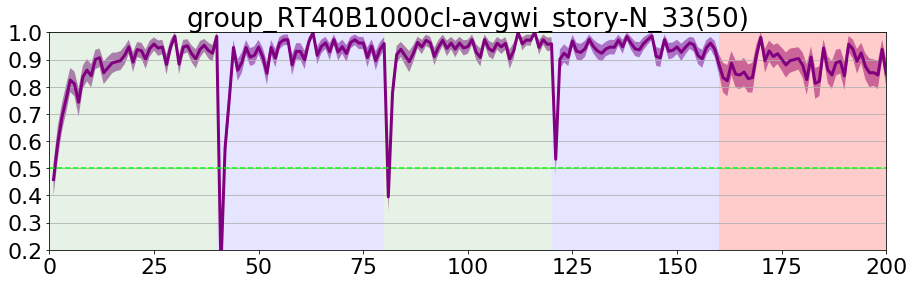

In [10]:
# thresholding

masked_group_tqdf = get_thresholded_tqdf(threshold=0.9)
num_subs = len(masked_group_tqdf.index.get_level_values('subjnum').unique())

# plotting
grouping = 'story'
plt.figure(figsize=(15,4))
M = masked_group_tqdf.correct_response.groupby([grouping]).mean()
N = masked_group_tqdf.correct_response.groupby([grouping]).count()
S = masked_group_tqdf.correct_response.groupby([grouping]).std()/np.sqrt(N)
# plt.bar(np.arange(len(M))+1,M,yerr=S)
plt.plot(np.arange(len(M))+1,M,c='purple',lw=3)
plt.fill_between(np.arange(1,201),M-S,M+S,
                  facecolor='purple',alpha=0.5)

plt.axhline(0.5,c='lime',ls='--')
plt.yticks(np.arange(0,1.1,.1))

plt.ylim(0.2,1)
plt.grid(axis='y')
block_size = 40
cL = ['green','blue']
for idx,t1 in enumerate(range(0,160,block_size)):
  t2 = t1+block_size+1
  plt.fill_between(np.arange(t1,t2),0,1.05,
                  facecolor=cL[idx%2],alpha=0.1)
plt.fill_between(np.arange(160,201),0,1.05,
                  facecolor='red',alpha=0.2)
#   plt.axvline(t1,c='r',alpha=.5)
  
plt.xlim(0,200)
title = 'group_%s-avgwi_%s-N_%i(%i)'%(DATASET_NAME,grouping,num_subs,Nsubs)
plt.title(title)
# plt.savefig('figures/'+title)


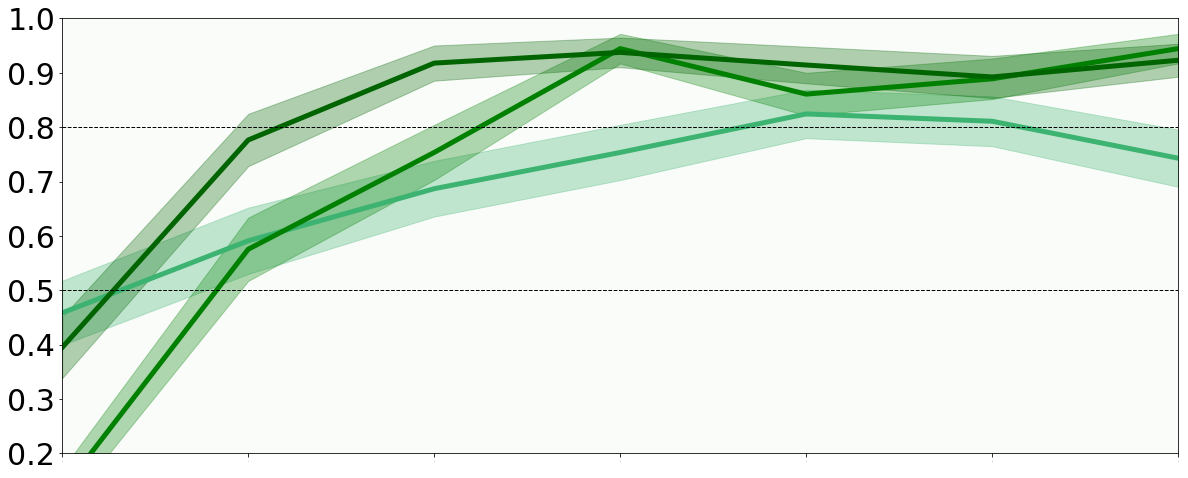

In [11]:
t1 = np.arange(0,200,40)
plt.figure(figsize=(20,8))
plt.yticks(fontsize=30)
plt.xticks(fontsize=0)

dt = 7
t2 = t1+dt
cL = ['mediumseagreen','green','darkgreen']
for idx in range(3):
  m = M[t1[idx]:t2[idx]]
  s = S[t1[idx]:t2[idx]]
  plt.plot(np.arange(dt),M[t1[idx]:t2[idx]],
           color=cL[idx],lw=5)
  plt.fill_between(np.arange(dt),m-s,m+s,
                   alpha=.3,color=cL[idx])

plt.fill_between(np.arange(10),-0.5,1.05,
                   alpha=0.02,color='green')

plt.ylim(0.2,1)
plt.xlim(0,dt-1)
plt.axhline(0.8,ls='--',lw=1,c='black')
plt.axhline(0.5,ls='--',lw=1,c='black')
plt.axhline(0.2,ls='--',lw=1,c='black')
# plt.savefig('figures/blocked_transfer')